In [1]:
# Loading and parsing data

# PLOT - parse data + std-dev
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import ticker
from scipy import stats

plt.style.use('seaborn')
sns.set(rc={'figure.figsize':(8,4)})
sns.set_style("whitegrid")

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

data_path = os.path.join(os.path.pardir, 'data', 'ipc')
sizes = [10, 1024, 102400, 1048576, 5242880]

# read praas data
#for size in sizes:
data = pd.read_csv(os.path.join(data_path, 'put_get_fargate.csv_sender'), sep=',| ')
#print(data)
#data.set_index('id', drop=True, inplace=True)
data['time'] /= 1000.0 * 1000.0 * 2
data['type'] = 'put_get'
data.drop(['repetition'], axis=1, inplace=True)

redis_data = pd.read_csv(os.path.join(data_path, 'redis_ec2_fargate.csv_sender'), sep=',| ')
#print(data)
#data.set_index('id', drop=True, inplace=True)
redis_data['time'] /= 1000.0 * 1000.0 *2
redis_data['type'] = 'redis'
redis_data.drop(['repetition'], axis=1, inplace=True)

s3_data = pd.read_csv(os.path.join(data_path, 's3_fargate.csv_sender'), sep=',| ')
#print(data)
#data.set_index('id', drop=True, inplace=True)
s3_data['time'] /= 1000.0 * 1000.0 * 2
s3_data['type'] = 's3'
s3_data.drop(['repetition'], axis=1, inplace=True)

                   
data_praas = pd.concat([redis_data, data, s3_data], axis=0)
print(data_praas)

/home/mcopik/.local/lib/python3.10/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/tmp/ipykernel_369958/1437084038.py:12: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')
/tmp/ipykernel_369958/1437084038.py:25: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data = pd.read_csv(os.path.join(data_path, 'put_get_fargate.csv_sender'), sep=',| ')
/tmp/ipykernel_369958/1437084038

        size        time  poll_time   type
0         10    2.902173    5140383  redis
1         10    2.883617    5106291  redis
2         10    2.891596    5127397  redis
3         10    2.894674    5104740  redis
4         10    2.922110    5171484  redis
..       ...         ...        ...    ...
495  5242880  249.823732  343405054     s3
496  5242880  263.912275  376684570     s3
497  5242880  229.722594  284449104     s3
498  5242880  300.808189  402871707     s3
499  5242880  263.274303  312292721     s3

[1500 rows x 4 columns]


/tmp/ipykernel_369958/1437084038.py:39: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  s3_data = pd.read_csv(os.path.join(data_path, 's3_fargate.csv_sender'), sep=',| ')


In [2]:
def p50_estimator(x):
    return np.percentile(x, 50)
def p95_estimator(x):
    return np.percentile(x, 95)
def p99_estimator(x):
    return np.percentile(x, 99)

/tmp/ipykernel_369958/3294067181.py:7: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.barplot(
/tmp/ipykernel_369958/3294067181.py:38: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['10B', '10 KiB', '100 KiB', '1 MiB', '5 MiB'])


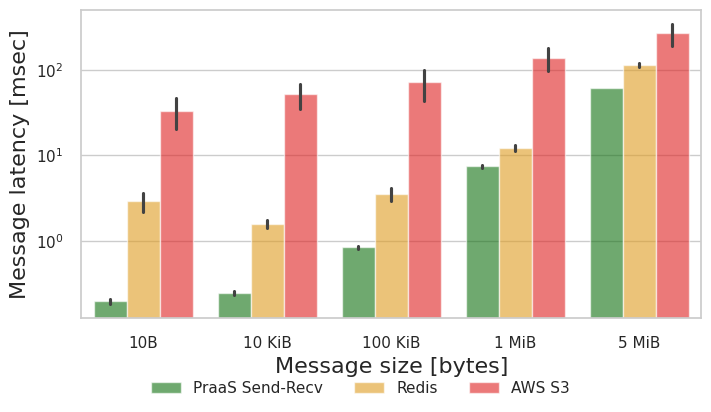

In [3]:

ax = plt.gca()


color = ['green','orange','red','blue','limegreen','darkgreen','royalblue','navy']


sns.barplot(
    data=data_praas,
    x="size", y="time", hue="type", hue_order=["put_get", "redis", "s3"],
    errorbar="sd", alpha=.6,#, height=6,
    estimator=p50_estimator, palette=color,
    ax=ax
)

prop = dict(arrowstyle="-|>,head_width=0.4,head_length=0.8",color='black',shrinkA=0,shrinkB=0)

#plt.annotate("", ha='left',xy=(0.1,2), xytext=(0.3,25), arrowprops=prop)
#ax.arrow(0.3, 25, -0.2, -23, head_width=0.1, head_length=0.4, fc='k', ec='k')
#plt.annotate("94% Reduction", ha='left',xy=(0,25), xytext=(0,25))
#plt.annotate("", ha='left',xy=(1.1,2), xytext=(1.3,25), arrowprops=prop)
#ax.arrow(0.3, 25, -0.2, -23, head_width=0.1, head_length=0.4, fc='k', ec='k')
#plt.annotate("93% Reduction", ha='left',xy=(1,25), xytext=(1,25))


#plt.annotate("94%, 93%, 91%, 83% and 69% latency reduction against Lambda", ha='left',xy=(-0.5,150), xytext=(-0.5,150))
#plt.annotate("", ha='left',xy=(1.1,2), xytext=(1.1,100), arrowprops=prop)
#plt.annotate("", ha='left',xy=(0.1,2), xytext=(0.1,100), arrowprops=prop)
#plt.annotate("", ha='left',xy=(2.1,2), xytext=(2.1,100), arrowprops=prop)
#plt.annotate("", ha='left',xy=(3.1,2), xytext=(3.1,100), arrowprops=prop)
    

#ax.despine(left=True)
ax.set_yscale("log")
ax.set_xlabel('Message size [bytes]',fontsize=16)
ax.set_ylabel('Message latency [msec]',fontsize=16)
ax.set_title("")

ax.set_xticklabels(['10B', '10 KiB', '100 KiB', '1 MiB', '5 MiB'])

import copy
import matplotlib.patches as mpatches

from matplotlib.lines import Line2D
#p = copy.copy(ax.get_legend_handles_labels()[0][0])
#print(dir(p.patches[0]))
#print(p.patches[1].set_color('black'))
#print(p.patches[2])
#print(p.patches[3])
#print(p.patches[4])
#print(ax.get_legend_handles_labels()[0][0].patches
p = Line2D([0], [0], color='black', ls='--',lw=2, label='black')
red_patch = mpatches.Patch(color='black', label='The red data')
ax.legend(loc='center', bbox_to_anchor=(0.45, -0.23),
    handles=ax.get_legend_handles_labels()[0],
    labels=['PraaS Send-Recv', 'Redis', 'AWS S3'],
    ncols=4        
)

import scienceplots

#plt.style.use(["science", "high-contrast", "ieee"])
ax.figure.savefig("ipc_latency.pdf",bbox_inches='tight',pad_inches = 0, transparent=False)

In [4]:
data_praas.groupby(['type', 'size'])['time'].count()

type     size   
put_get  10         100
         1024       100
         102400     100
         1048576    100
         5242880    100
redis    10         100
         1024       100
         102400     100
         1048576    100
         5242880    100
s3       10         100
         1024       100
         102400     100
         1048576    100
         5242880    100
Name: time, dtype: int64

In [4]:
data_praas.groupby(['type', 'size'])['time'].median()

type     size   
put_get  10           0.195551
         1024         0.241750
         102400       0.834178
         1048576      7.366352
         5242880     61.357669
redis    10           2.891547
         1024         1.555817
         102400       3.518411
         1048576     12.139321
         5242880    113.871484
s3       10          33.262770
         1024        51.601923
         102400      71.587951
         1048576    138.939059
         5242880    268.589512
Name: time, dtype: float64

data_praas.groupby(['type', 'size'])['poll_time'].median()

In [6]:
for size in [10, 1024, 102400, 1048576, 5242880]:
    #print('Warm Latency', data_praas.loc[(data_praas['type'] == 'praas_local') & (data_praas['size'] == size)]['time'].median())
    #print('Hot Latency', data_praas.loc[(data_praas['type'] == 'praas_remote') & (data_praas['size'] == size)]['time'].median())
    #print('AWS', data_praas.loc[(data_praas['type'] == 'aws') & (data_praas['size'] == size)]['time'].median())
    print(size, 'put_get', 1-(data_praas.loc[(data_praas['type'] == 'put_get') & (data_praas['size'] == size)]['time'].median()/data_praas.loc[(data_praas['type'] == 's3') & (data_praas['size'] == size)]['time'].median()))
    
#print('')


for size in [10, 1024, 102400, 1048576, 5242880]:
    #print('Warm Latency', data_praas.loc[(data_praas['type'] == 'praas_local') & (data_praas['size'] == size)]['time'].median())
    #print('Hot Latency', data_praas.loc[(data_praas['type'] == 'praas_remote') & (data_praas['size'] == size)]['time'].median())
    #print('AWS', data_praas.loc[(data_praas['type'] == 'aws') & (data_praas['size'] == size)]['time'].median())
    print(size, 'redis', 1-(data_praas.loc[(data_praas['type'] == 'put_get') & (data_praas['size'] == size)]['time'].median()/data_praas.loc[(data_praas['type'] == 'redis') & (data_praas['size'] == size)]['time'].median()))

10 put_get 0.9941210247532077
1024 put_get 0.9953150922528842
102400 put_get 0.9883475153114367
1048576 put_get 0.9469814138190564
5242880 put_get 0.7715559761478028
10 redis 0.9323715011055067
1024 redis 0.8446152157701092
102400 redis 0.7629107118888834
1048576 redis 0.39318250598236704
5242880 redis 0.46116738937028345
